In [1]:
import re

In [2]:
pattern = (r'[0-9a-f]{2}\:[0-9a-f]{2}\:[0-9a-f]{2}\:[0-9a-f]{2}\:[0-9a-f]{2}\:[0-9a-f]{2}')
with open("dump.txt", "r") as f:
    d=f.read()
    mac_addresses= re.findall(pattern, d)

In [3]:
unique_mac_addresses= set(re.findall(pattern, d))

In [4]:
unique_mac_addresses

{'00:00:74:b7:a5:03',
 '00:08:e3:ff:ff:20',
 '00:11:32:2e:c9:10',
 '00:1a:1e:00:aa:28',
 '00:1a:1e:01:61:30',
 '00:20:6b:6e:c3:80',
 '00:21:b7:a6:7c:38',
 '00:21:b7:b1:0b:da',
 '00:21:b7:d6:45:df',
 '00:21:b7:fd:26:45',
 '00:24:36:a0:37:8c',
 '00:25:ab:a3:ee:f7',
 '00:50:56:91:19:10',
 '00:50:56:91:52:12',
 '00:50:56:91:5c:9d',
 '00:50:56:91:a0:f9',
 '00:50:56:91:cc:cb',
 '00:50:56:92:10:13',
 '00:50:56:92:3e:a8',
 '00:50:56:ba:00:39',
 '00:50:56:bd:29:3e',
 '00:50:56:bd:3e:02',
 '00:50:56:bd:bb:54',
 '00:50:56:bd:fb:0d',
 '00:56:2b:89:38:8e',
 '00:56:2b:89:3a:b3',
 '00:56:2b:89:3d:73',
 '00:56:2b:89:3f:64',
 '00:56:2b:89:44:d2',
 '00:56:2b:89:46:c9',
 '00:9e:1e:15:ec:9c',
 '00:9e:1e:15:f2:df',
 '00:9e:1e:15:f3:0f',
 '00:c0:ee:94:3e:f4',
 '00:d8:61:61:92:7a',
 '00:e0:c9:21:d3:95',
 '00:e0:c9:21:d3:d1',
 '00:e1:6d:7a:9b:98',
 '01:00:5e:00:00:fb',
 '01:00:5e:00:00:fc',
 '08:2e:5f:1e:9a:f9',
 '08:2e:5f:2b:6a:2b',
 '08:2e:5f:2c:da:f6',
 '08:ec:f5:e4:b0:be',
 '0c:4d:e9:c1:68:74',
 '10:60:4b

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [6]:
data=np.genfromtxt("mnist1000.csv", delimiter=',', skip_header=1)

In [9]:
labels=data[:,0]
len(labels)

998

In [10]:
X=data[:,1:]

In [16]:
X.shape
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

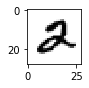

In [12]:
plt.figure(figsize=(1, 1))
plt.imshow(X[5].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [13]:
pca = PCA(n_components=100)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [30]:
Xt = pca.fit_transform(X)
Xt

array([[  202.35365993,   338.69349495,   212.59231584, ...,
           95.82443284,    -8.08736274,    56.7315695 ],
       [ 1104.41499599,   428.34085951,  -129.88445162, ...,
           -5.30848826,   -95.11307599,    76.74379048],
       [   10.51079931,  -419.41410513,   121.3242998 , ...,
           43.25505886,   225.05068794,    89.13095551],
       ...,
       [  274.97648219,  -658.01020908,  -296.8137511 , ...,
           30.13760096,    61.79874087,    94.1008209 ],
       [  -41.4529578 ,   -58.88892493,   167.07023222, ...,
          -73.7119373 ,    45.92424023,     6.99326991],
       [  770.02237321,   204.97378364, -1077.88728586, ...,
          -24.71922238,    45.76301749,   -38.13612368]])

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [31]:
X_train, X_test, y_train, y_test = train_test_split(Xt,labels,test_size=.2, random_state=42)

In [32]:
clf=SVC(gamma='scale')
param_grid = {
    'kernel':['linear', 'rbf', 'poly'],
    'C': [1, 50, 100, 1000]
}
grid_search = GridSearchCV(
    clf, param_grid, cv=10, scoring='accuracy')

In [33]:
grid_search.fit(X_train, y_train)

C:\Users\RYAND\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 50, 100, 1000],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [34]:
from sklearn import metrics
bestModel=grid_search.best_estimator_
metrics.accuracy_score(y_test, bestModel.predict(X_test))

0.92

In [35]:
unknownDigits=np.genfromtxt("RecognizeDigits.csv", delimiter=',')

In [36]:
predictedDigits = bestModel.predict(pca.transform(unknownDigits))
predictedDigits

array([4., 0., 5.])

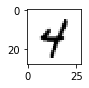

In [37]:
plt.figure(figsize=(1, 1))
plt.imshow(unknownDigits[0,:].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

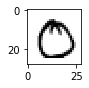

In [38]:
plt.figure(figsize=(1, 1))
plt.imshow(unknownDigits[1,:].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

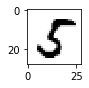

In [39]:
plt.figure(figsize=(1, 1))
plt.imshow(unknownDigits[2,:].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

<h5>Yes the predictions, match the actual digits